# 04 - a - Earth - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object
planet=Planet("EARTH")
planet.h_skip = 140000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Earth/earth-gram-avg.dat', 0 , 1 ,2, 3 )

vinf_kms_array = np.linspace( 0.0,   20.0,  11)
LD_array       = np.linspace( 0.0,    0.4 , 11)

In [4]:
#os.makedirs('../data/jsr-paper/earth/')

In [5]:
runID = 'earth-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+140.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [6]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(140.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 1.0, -80.0, -4.0, 1E-10, 400.0)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -80.0, -4.0, 1E-10, 400.0)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/earth/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -6.620145675511594 USL: -6.620145675511594, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.04 OSL: -6.535040746584855 USL: -6.717427210802271, TCW: 0.18238646421741578 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.08 OSL: -6.460754934396391 USL: -6.828386501645582, TCW: 0.367631567249191 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.12 OSL: -6.3958453706 USL: -6.954470440025034, TCW: 0.5586250694250339 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.16 OSL: -6.339003598979616 USL: -7.096812388441322, TCW: 0.7578087894617056 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -6.289097684257285 USL: -7.257632841228769, TCW: 0.968535156971484 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.24 OSL: -6.244961058884655 USL: -7.43709261296317, TCW: 1.1921315540785145 EFOS: 1.0 EFUS: 1.0
Run #8 of 121: A

Run #59 of 121: Arrival V_infty: 10.0 km/s, L/D:0.12 OSL: -7.606469362235657 USL: -8.663461269683467, TCW: 1.0569919074478094 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 10.0 km/s, L/D:0.16 OSL: -7.522627649923379 USL: -8.983198488083872, TCW: 1.4605708381604927 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 10.0 km/s, L/D:0.2 OSL: -7.452015178394504 USL: -9.356498290911986, TCW: 1.9044831125174824 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 10.0 km/s, L/D:0.24 OSL: -7.391589051461779 USL: -9.78800825822691, TCW: 2.396419206765131 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 10.0 km/s, L/D:0.28 OSL: -7.339083175273117 USL: -10.28406505426392, TCW: 2.944981878990802 EFOS: 1.0 EFUS: 1.0
Run #64 of 121: Arrival V_infty: 10.0 km/s, L/D:0.32 OSL: -7.292834028961806 USL: -10.84875742375516, TCW: 3.5559233947933535 EFOS: 1.0 EFUS: 1.0
Run #65 of 121: Arrival V_infty: 10.0 km/s, L/D:0.36 OSL: -7.251671176865784 USL: -11.489106022043416, TCW: 4.237434845177631 EF

Run #116 of 121: Arrival V_infty: 20.0 km/s, L/D:0.2 OSL: -8.168350669100619 USL: -11.644615649474872, TCW: 3.4762649803742534 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 20.0 km/s, L/D:0.24 OSL: -8.096331028387795 USL: -12.573065239052085, TCW: 4.47673421066429 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 20.0 km/s, L/D:0.28 OSL: -8.03473959026087 USL: -13.525573590541171, TCW: 5.4908340002803016 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 20.0 km/s, L/D:0.32 OSL: -7.981077174339589 USL: -14.548643576490576, TCW: 6.567566402150987 EFOS: 1.0 EFUS: 1.0
Run #120 of 121: Arrival V_infty: 20.0 km/s, L/D:0.36 OSL: -7.933630145493225 USL: -15.639545474081388, TCW: 7.705915328588162 EFOS: 1.0 EFUS: 1.0
Run #121 of 121: Arrival V_infty: 20.0 km/s, L/D:0.4 OSL: -7.891160102451977 USL: -16.790053904609522, TCW: 8.898893802157545 EFOS: 1.0 EFUS: 1.0


In [7]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(140.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(140.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/earth/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/earth/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 3.8442174578118227 QDOT_MAX: 285.7546109416119 J_MAX: 27093.237121927777 STAG. PRES: 0.0745144124363312
V_infty: 0.0 km/s, L/D: 0.04 G_MAX: 4.253276250941478 QDOT_MAX: 302.0251504864408 J_MAX: 28099.41150789806 STAG. PRES: 0.06746954114851204
V_infty: 0.0 km/s, L/D: 0.08 G_MAX: 4.714241331112608 QDOT_MAX: 319.7045883342328 J_MAX: 29152.78231749199 STAG. PRES: 0.061203631473746856
V_infty: 0.0 km/s, L/D: 0.12 G_MAX: 5.230618190057675 QDOT_MAX: 338.76985815198606 J_MAX: 30233.08389497681 STAG. PRES: 0.055689690721382294
V_infty: 0.0 km/s, L/D: 0.16 G_MAX: 5.804742425292187 QDOT_MAX: 359.08429506049185 J_MAX: 31335.82799354548 STAG. PRES: 0.05086728341447316
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 6.438848444405146 QDOT_MAX: 380.9396111443384 J_MAX: 32451.99599863324 STAG. PRES: 0.046681893111492796
V_infty: 0.0 km/s, L/D: 0.24 G_MAX: 7.134016854684438 QDOT_MAX: 403.9593367196527 J_MAX: 33573.425103402966 STAG. PRES: 0.043017046021843176
V_infty: 0.0 km/s, L/

V_infty: 10.0 km/s, L/D: 0.2 G_MAX: 25.057284131553057 QDOT_MAX: 4104.487885360475 J_MAX: 101599.68125527508 STAG. PRES: 0.126367887907685
V_infty: 10.0 km/s, L/D: 0.24 G_MAX: 28.793155978717525 QDOT_MAX: 4638.339142393573 J_MAX: 103746.24200452074 STAG. PRES: 0.1147127471659687
V_infty: 10.0 km/s, L/D: 0.28 G_MAX: 32.909411092027554 QDOT_MAX: 5236.084845666794 J_MAX: 105871.39631779361 STAG. PRES: 0.10502079858654188
V_infty: 10.0 km/s, L/D: 0.32 G_MAX: 37.57177760348084 QDOT_MAX: 5910.444928069601 J_MAX: 107974.51309127238 STAG. PRES: 0.09686512819301266
V_infty: 10.0 km/s, L/D: 0.36 G_MAX: 43.00784492270303 QDOT_MAX: 6648.399948403473 J_MAX: 110056.69874657266 STAG. PRES: 0.08991550289045826
V_infty: 10.0 km/s, L/D: 0.4 G_MAX: 49.31322972003822 QDOT_MAX: 7462.737550736608 J_MAX: 112096.63879803267 STAG. PRES: 0.08394255553755736
V_infty: 12.0 km/s, L/D: 0.0 G_MAX: 16.28736477458129 QDOT_MAX: 3729.696335005211 J_MAX: 133611.51884510386 STAG. PRES: 0.31552298694250097
V_infty: 12.0 km

V_infty: 20.0 km/s, L/D: 0.36 G_MAX: 198.57144005917877 QDOT_MAX: 73079.39873906251 J_MAX: 331571.1589542983 STAG. PRES: 0.2565339262344884
V_infty: 20.0 km/s, L/D: 0.4 G_MAX: 221.76249991942987 QDOT_MAX: 88109.54857906738 J_MAX: 334959.8159744388 STAG. PRES: 0.2385245359861931


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

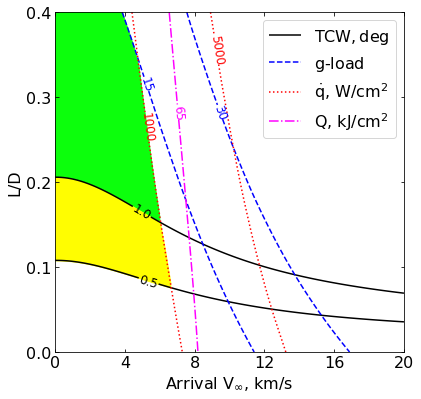

In [20]:
x = np.loadtxt('../data/jsr-paper/earth/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/earth/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0])

Glevels = np.array([15.0, 30.0])
Qlevels = np.array([1000, 5000.0])
Hlevels = np.array([65.0])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks(np.array([ 0, 4, 8, 12, 16, 20]), fontsize=16)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,20.0])
plt.ylim([0.0,0.4])

plt.savefig('../data/jsr-paper/earth/earth-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/earth/earth-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/earth/earth-lift-small.eps', dpi=300,bbox_inches='tight')



plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


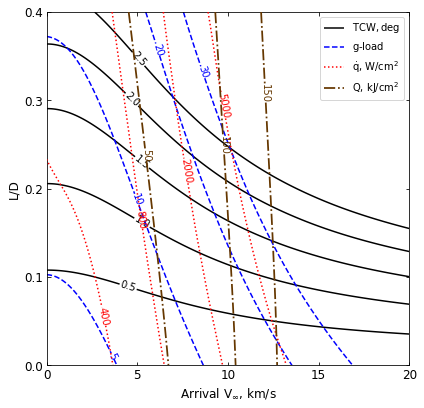

In [19]:
x = np.loadtxt('../data/jsr-paper/earth/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/earth/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/earth/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
    #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.5,1.0,1.5,2.0,2.5])

Glevels = np.array([5.0, 10.0, 20.0, 30.0])
Qlevels = np.array([400.0, 800.0, 2000.0, 5000.0 ])
Hlevels = np.array([50.0, 100.0, 150.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)




ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')



QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

labelsH = plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

for l in labelsH:
    l.set_rotation(-90)



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)



#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20]),fontsize=12)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=10)


plt.savefig('../data/jsr-paper/earth/earth-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/earth/earth-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/earth/earth-lift-large.eps', dpi=300,bbox_inches='tight')



plt.show()
